In [1]:
#Importing required packages

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Reading and Understanding Data

In [2]:
bike_sharing = pd.read_csv('day (1).csv',index_col='instant')
bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_sharing.nunique()

dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [4]:
# Classifying features w.r to nature 

numerical = ['dteday','temp','atemp','hum','windspeed','casual','registered','cnt']
categorical = ['season','mnth','weekday','weathersit']
boolean = ['yr','holiday','workingday']

In [5]:
bike_sharing.shape

(730, 15)

In [6]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [7]:
bike_sharing.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


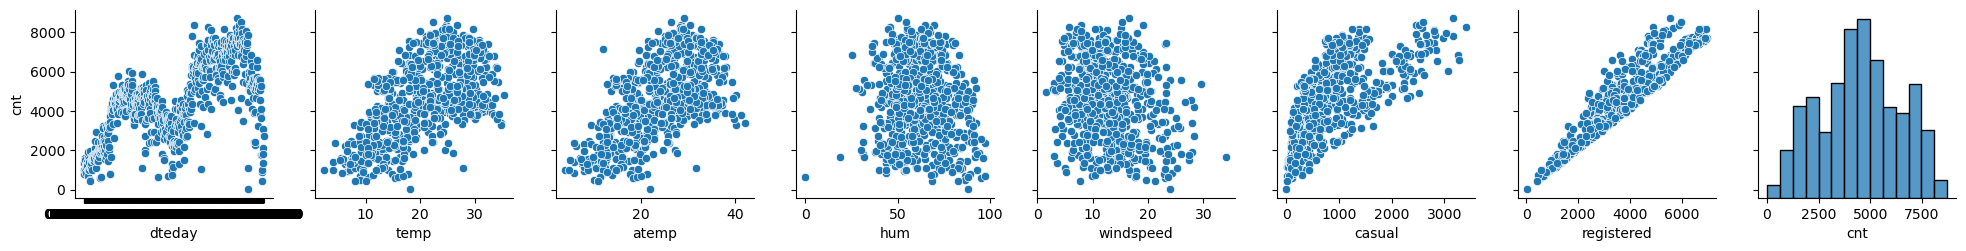

In [8]:
sns.pairplot(data=bike_sharing,x_vars=numerical,y_vars='cnt')
plt.show()

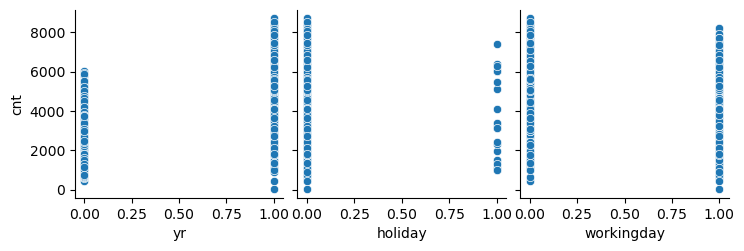

In [9]:
sns.pairplot(data=bike_sharing,x_vars=boolean,y_vars='cnt')
plt.show()

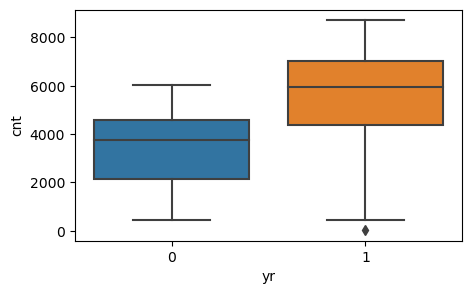

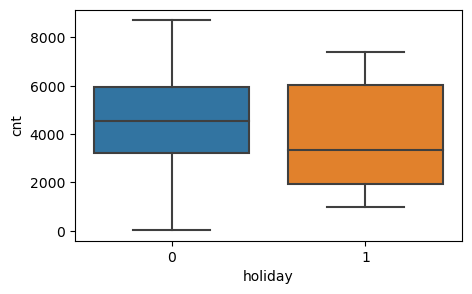

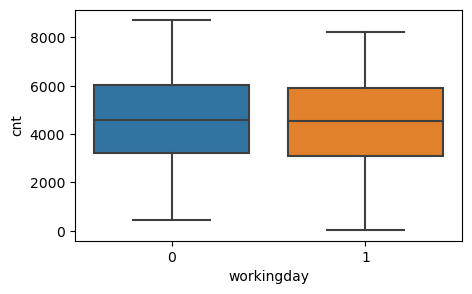

In [10]:
for i in boolean:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=bike_sharing,x=i,y='cnt')
    plt.show()

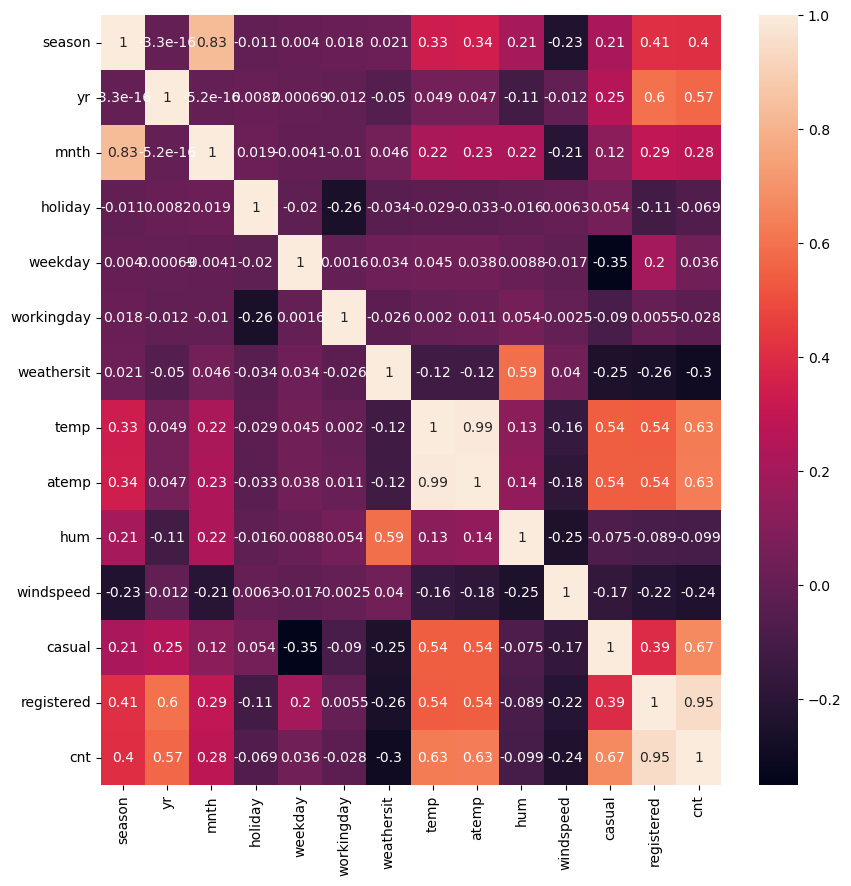

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(bike_sharing.corr(),annot=True)
plt.show()

### Observations from plots:
    - temp, atemp, registered and casual show positive relationship with target variable 
    - Holidays have a quite lesser number of customers
    - Summer and fall has higher number of rentals as compared to the others seasons
    - 6th, 7th, 8th and 9th month saw highest number of rentals
    - Rentals are same on almost all the weekdays
    - Rentals are highest if weather situation is Clear, Few clouds, Partly cloudy, Partly cloudy or 
    - There is no customer if weather situation is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    
### Above variables could be driving parameters for Linear Regression model

### Data Preparation

In [12]:
bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
# Categorizing the category columns according to provided data dictionary

bike_sharing.season = bike_sharing['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
bike_sharing.mnth = bike_sharing['mnth'].map({1:'jan',2:'feb',3:'mar',4:'april',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_sharing.weekday = bike_sharing['weekday'].map({1:'mon',2:'tue',3:'wed',4:'thurs',5:'fri',6:'sat',0:'sun'})
bike_sharing.weathersit = bike_sharing['weathersit'].map({1:'clear',2:'mist',3:'snow',4:'rain'})

bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,jan,0,mon,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,jan,0,tue,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,jan,0,thurs,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


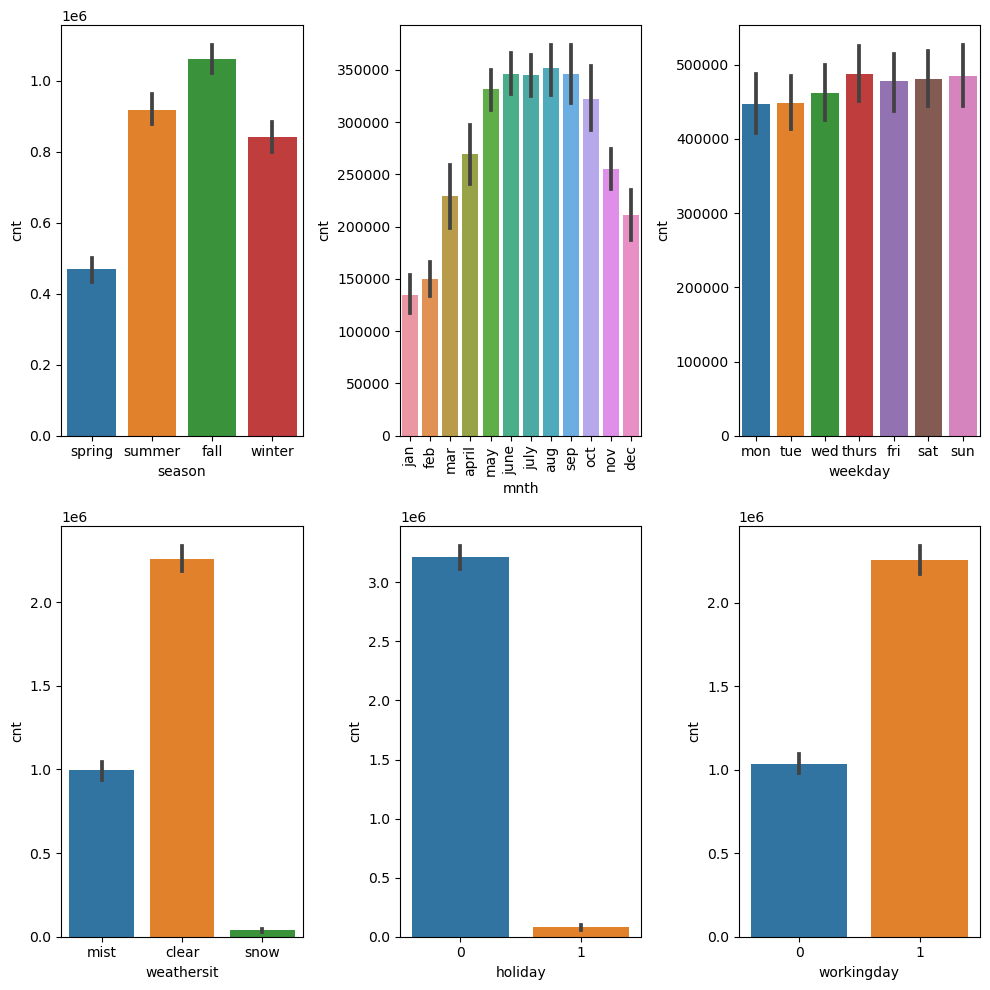

In [14]:
plt.figure(figsize=(10,10))

plt.subplot(2,3,1)
sns.barplot(x='season',y='cnt',data=bike_sharing,estimator=np.sum)

plt.subplot(2,3,2)
sns.barplot(x='mnth',y='cnt',data=bike_sharing,estimator=np.sum)
plt.xticks(rotation = 90)


plt.subplot(2,3,3)
sns.barplot(x='weekday',y='cnt',data=bike_sharing,estimator=np.sum)

plt.subplot(2,3,4)
sns.barplot(x='weathersit',y='cnt',data=bike_sharing,estimator=np.sum)

plt.subplot(2,3,5)
sns.barplot(x='holiday',y='cnt',data=bike_sharing,estimator=np.sum)

plt.subplot(2,3,6)
sns.barplot(x='workingday',y='cnt',data=bike_sharing,estimator=np.sum)

plt.tight_layout()
plt.show()

In [15]:
seasons = pd.get_dummies(bike_sharing.season,drop_first=True)
seasons.head()

,spring,summer,winter
instant,,,
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0


In [16]:
months = pd.get_dummies(bike_sharing.mnth,drop_first=True)
months.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
instant,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0


In [17]:
weekdays = pd.get_dummies(bike_sharing.weekday,drop_first=True)
weekdays.head()

,mon,sat,sun,thurs,tue,wed
instant,,,,,,
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,0,0,0


In [18]:
weather = pd.get_dummies(bike_sharing.weathersit,drop_first=False)
weather.drop('snow',axis=1,inplace=True)
weather.head()

,clear,mist
instant,,
1,0,1
2,0,1
3,1,0
4,1,0
5,1,0


In [19]:
bike_sharing = pd.concat([bike_sharing,seasons,months,weather,weekdays],axis=1)
bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,oct,sep,clear,mist,mon,sat,sun,thurs,tue,wed
instant,,,,,,,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,jan,0,mon,1,mist,14.110847,18.18125,...,0,0,0,1,1,0,0,0,0,0
2,02-01-2018,spring,0,jan,0,tue,1,mist,14.902598,17.68695,...,0,0,0,1,0,0,0,0,1,0
3,03-01-2018,spring,0,jan,0,wed,1,clear,8.050924,9.47025,...,0,0,1,0,0,0,0,0,0,1
4,04-01-2018,spring,0,jan,0,thurs,1,clear,8.200000,10.60610,...,0,0,1,0,0,0,0,1,0,0
5,05-01-2018,spring,0,jan,0,fri,1,clear,9.305237,11.46350,...,0,0,1,0,0,0,0,0,0,0


In [20]:
bike_sharing.drop(columns=['season','mnth','weekday','weathersit'],inplace=True)
bike_sharing.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,oct,sep,clear,mist,mon,sat,sun,thurs,tue,wed
instant,,,,,,,,,,,,,,,,,,,,,
1,01-01-2018,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,1,1,0,0,0,0,0
2,02-01-2018,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,1,0,0,0,0,1,0
3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,1,0,0,0,0,0,0,1
4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,1,0,0,0,0,1,0,0
5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,1,0,0,0,0,0,0,0


In [21]:
# dropping 'dteday' as the information from data column is already extracted

bike_sharing.drop('dteday',axis=1,inplace=True)
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,oct,sep,clear,mist,mon,sat,sun,thurs,tue,wed
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,1,0,0,0,0,1,0
3,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,1,0,0,0,0,0,0,1
4,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,1,0,0,0,0,1,0,0
5,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,1,0,0,0,0,0,0,0


### Splitting into training and test data set

In [22]:
df_train, df_test = train_test_split(bike_sharing,train_size= 0.70,random_state=100)

In [23]:
df_train.shape

(510, 32)

In [24]:
df_test.shape

(220, 32)

In [25]:
bike_sharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'spring', 'summer', 'winter', 'aug',
       'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct', 'sep',
       'clear', 'mist', 'mon', 'sat', 'sun', 'thurs', 'tue', 'wed'],
      dtype='object')

### Scaling train data set

In [26]:
scaler = MinMaxScaler()

num_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,oct,sep,clear,mist,mon,sat,sun,thurs,tue,wed
instant,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,...,0,0,1,0,0,0,0,0,0,1
427,1,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,...,0,0,0,1,0,0,1,0,0,0
729,1,0,1,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,...,0,0,1,0,1,0,0,0,0,0
483,1,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,...,0,0,0,1,0,0,1,0,0,0
112,0,0,0,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,...,0,0,0,1,0,0,1,0,0,0


In [27]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,oct,sep,clear,mist,mon,sat,sun,thurs,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499,...,0.084314,0.080392,0.625490,0.345098,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421,...,0.278131,0.272166,0.484471,0.475867,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Preparing model using forward selection method

In [28]:
y_train = df_train['cnt']
X_train = df_train['yr']

In [29]:
X_train_sm = sm.add_constant(X_train)
LR_1 = sm.OLS(y_train,X_train_sm).fit()
LR_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     273.3
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           1.95e-49
Time:                        10:42:40   Log-Likelihood:                 148.67
No. Observations:                 510   AIC:                            -293.3
Df Residuals:                     508   BIC:                            -284.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3788      0.011     33.131      0.000       0.356       0.401
yr             0.2652      0.016     16.531      0.000       0.234       0.297
==============================================================================
Omnibus:                       27.322   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.203
Skew:                          -0.560   Prob(JB):                     4.56e-07
Kurtosis:                       2.654   Cond. No.                         2.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
y_train = df_train['cnt']
X_train = df_train[['yr','casual']]
X_train_sm = sm.add_constant(X_train)
LR_2 = sm.OLS(y_train,X_train_sm).fit()
LR_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     446.9
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.29e-112
Time:                        10:42:40   Log-Likelihood:                 298.06
No. Observations:                 510   AIC:                            -590.1
Df Residuals:                     507   BIC:                            -577.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2573      0.010     24.592      0.000       0.237       0.278
yr             0.2009      0.012     16.196      0.000       0.177       0.225
casual         0.6054      0.030     20.095      0.000       0.546       0.665
==============================================================================
Omnibus:                       17.482   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.915
Skew:                          -0.284   Prob(JB):                      0.00157
Kurtosis:                       2.467   Cond. No.                         6.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Feature 'Registered' can't be added

y_train = df_train['cnt']
X_train = df_train[['yr','casual','registered']]
X_train_sm = sm.add_constant(X_train)
LR_3 = sm.OLS(y_train,X_train_sm).fit()
LR_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.311e+32
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:42:40   Log-Likelihood:                 17826.
No. Observations:                 510   AIC:                        -3.564e+04
Df Residuals:                     506   BIC:                        -3.563e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.504e-16   1.84e-17    -19.044      0.000   -3.87e-16   -3.14e-16
yr          2.255e-17   1.81e-17      1.243      0.214   -1.31e-17    5.82e-17
casual         0.3775   3.77e-17      1e+16      0.000       0.377       0.377
registered     0.7968    4.2e-17    1.9e+16      0.000       0.797       0.797
==============================================================================
Omnibus:                       10.899   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                6.384
Skew:                          -0.070   Prob(JB):                       0.0411
Kurtosis:                       2.470   Cond. No.                         8.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
vif=pd.DataFrame()
vif['feature']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,feature,VIF
0,const,6.69
3,registered,1.81
1,yr,1.63
2,casual,1.19


### Feature "Registered" can't be added to model, it has no significance in change of dependent variable with 'casual' and 'yr' in model

In [33]:
y_train = df_train['cnt']
X_train = df_train[['yr','casual','atemp','holiday']]
X_train_sm = sm.add_constant(X_train)
LR_4 = sm.OLS(y_train,X_train_sm).fit()
LR_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     411.4
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          2.51e-157
Time:                        10:42:40   Log-Likelihood:                 408.38
No. Observations:                 510   AIC:                            -806.8
Df Residuals:                     505   BIC:                            -785.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0946      0.013      7.068      0.000       0.068       0.121
yr             0.2082      0.010     20.775      0.000       0.189       0.228
casual         0.3475      0.029     11.931      0.000       0.290       0.405
atemp          0.4418      0.028     16.062      0.000       0.388       0.496
holiday       -0.0806      0.031     -2.620      0.009      -0.141      -0.020
==============================================================================
Omnibus:                       31.986   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.361
Skew:                          -0.531   Prob(JB):                     1.04e-09
Kurtosis:                       3.905   Cond. No.                         9.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
vif=pd.DataFrame()
vif['feature']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,feature,VIF
0,const,7.66
2,casual,1.54
3,atemp,1.46
1,yr,1.07
4,holiday,1.01


In [35]:
y_train = df_train['cnt']
X_train = df_train[['yr','casual','atemp','holiday','clear']]
X_train_sm = sm.add_constant(X_train)
LR_5 = sm.OLS(y_train,X_train_sm).fit()
LR_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     361.3
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          4.72e-164
Time:                        10:42:40   Log-Likelihood:                 427.19
No. Observations:                 510   AIC:                            -842.4
Df Residuals:                     504   BIC:                            -817.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0626      0.014      4.507      0.000       0.035       0.090
yr             0.2096      0.010     21.667      0.000       0.191       0.229
casual         0.3153      0.029     11.036      0.000       0.259       0.371
atemp          0.4445      0.027     16.747      0.000       0.392       0.497
holiday       -0.0897      0.030     -3.018      0.003      -0.148      -0.031
clear          0.0613      0.010      6.212      0.000       0.042       0.081
==============================================================================
Omnibus:                       32.485   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.616
Skew:                          -0.542   Prob(JB):                     9.19e-10
Kurtosis:                       3.886   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
vif=pd.DataFrame()
vif['feature']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,feature,VIF
0,const,8.88
2,casual,1.59
3,atemp,1.46
1,yr,1.07
5,clear,1.05
4,holiday,1.01


In [37]:
X_train_sm = df_train[['yr','casual','atemp','holiday','clear','mist']]
vif=pd.DataFrame()
vif['feature']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,feature,VIF
2,atemp,8.55
4,clear,4.87
1,casual,3.94
5,mist,2.85
0,yr,2.16
3,holiday,1.03


### 'Clear' and 'Mist' show high collinearity with 'atemp' hence we dont add both to the model

In [38]:
y_train = df_train['cnt']
X_train = df_train[['yr','casual','atemp','holiday','clear','spring']]
X_train_sm = sm.add_constant(X_train)
LR_6 = sm.OLS(y_train,X_train_sm).fit()
LR_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     380.3
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          2.61e-183
Time:                        10:42:42   Log-Likelihood:                 475.28
No. Observations:                 510   AIC:                            -936.6
Df Residuals:                     503   BIC:                            -906.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1680      0.016     10.289      0.000       0.136       0.200
yr             0.2159      0.009     24.445      0.000       0.199       0.233
casual         0.2744      0.026     10.423      0.000       0.223       0.326
atemp          0.3024      0.028     10.843      0.000       0.248       0.357
holiday       -0.0860      0.027     -3.176      0.002      -0.139      -0.033
clear          0.0712      0.009      7.882      0.000       0.053       0.089
spring        -0.1299      0.013    -10.218      0.000      -0.155      -0.105
==============================================================================
Omnibus:                       99.485   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.088
Skew:                          -1.000   Prob(JB):                     3.29e-52
Kurtosis:                       5.675   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
vif=pd.DataFrame()
vif['feature']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,feature,VIF
0,const,14.77
3,atemp,1.94
6,spring,1.65
2,casual,1.63
1,yr,1.08
5,clear,1.06
4,holiday,1.01


In [40]:
y_train = df_train['cnt']
X_train = df_train[['yr','casual','atemp','holiday','clear','spring','summer']]
X_train_sm = sm.add_constant(X_train)
LR_7 = sm.OLS(y_train,X_train_sm).fit()
LR_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     328.8
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          5.74e-183
Time:                        10:42:43   Log-Likelihood:                 477.55
No. Observations:                 510   AIC:                            -939.1
Df Residuals:                     502   BIC:                            -905.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1782      0.017     10.500      0.000       0.145       0.212
yr             0.2156      0.009     24.493      0.000       0.198       0.233
casual         0.2812      0.026     10.639      0.000       0.229       0.333
atemp          0.2950      0.028     10.531      0.000       0.240       0.350
holiday       -0.0893      0.027     -3.302      0.001      -0.142      -0.036
clear          0.0705      0.009      7.826      0.000       0.053       0.088
spring        -0.1379      0.013    -10.427      0.000      -0.164      -0.112
summer        -0.0222      0.011     -2.116      0.035      -0.043      -0.002
==============================================================================
Omnibus:                      106.713   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.518
Skew:                          -1.056   Prob(JB):                     5.99e-58
Kurtosis:                       5.818   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### With 'spring' in model the significance of summer decreased as well as difference in R squared and adjusted R squared increased

In [41]:
vif=pd.DataFrame()
vif['feature']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,feature,VIF
0,const,16.06
3,atemp,1.97
6,spring,1.80
2,casual,1.65
7,summer,1.15
1,yr,1.08
5,clear,1.06
4,holiday,1.01


### Hence, we keep only 'spring' from all the seasons 

In [42]:
y_train = df_train['cnt']
X_train = df_train[['yr','casual','atemp','holiday','clear','spring','mon','sun','tue','summer']]
X_train_sm = sm.add_constant(X_train)
LR_8 = sm.OLS(y_train,X_train_sm).fit()
LR_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     303.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          9.70e-205
Time:                        10:42:44   Log-Likelihood:                 537.75
No. Observations:                 510   AIC:                            -1054.
Df Residuals:                     499   BIC:                            -1007.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2375      0.016     14.803      0.000       0.206       0.269
yr             0.1995      0.008     24.989      0.000       0.184       0.215
casual         0.4636      0.029     16.082      0.000       0.407       0.520
atemp          0.2049      0.026      7.813      0.000       0.153       0.256
holiday       -0.1192      0.024     -4.909      0.000      -0.167      -0.071
clear          0.0607      0.008      7.479      0.000       0.045       0.077
spring        -0.1317      0.012    -11.142      0.000      -0.155      -0.108
mon           -0.1412      0.013    -10.989      0.000      -0.166      -0.116
sun           -0.0702      0.012     -5.632      0.000      -0.095      -0.046
tue           -0.0738      0.011     -6.557      0.000      -0.096      -0.052
summer        -0.0352      0.009     -3.733      0.000      -0.054      -0.017
==============================================================================
Omnibus:                       91.341   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.164
Skew:                          -0.939   Prob(JB):                     6.28e-46
Kurtosis:                       5.504   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
vif=pd.DataFrame()
vif['feature']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,feature,VIF
0,const,18.08
2,casual,2.47
3,atemp,2.17
6,spring,1.80
7,mon,1.52
8,sun,1.29
10,summer,1.16
9,tue,1.15
1,yr,1.12
5,clear,1.08


In [44]:
y_train = df_train['cnt']
X_train = df_train[['yr','casual','atemp','holiday','clear','spring','mon','sun','tue','summer','jan','feb','mar','may','june','july','aug','sep','oct','nov','dec']]
X_train_sm = sm.add_constant(X_train)
vif=pd.DataFrame()
vif['feature']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,feature,VIF
0,const,88.37
10,summer,6.92
6,spring,6.76
3,atemp,5.83
17,aug,5.64
11,jan,5.32
20,nov,5.07
16,july,5.03
19,oct,4.78
18,sep,4.74


We can see that with addition of months the collinearity in variables increases probably due to the seasonal change with months the VIF value is changing since the same trend is caught by seasonal variable. 

***Note : LR_8 is our first model using Forward selection method***

### Model using RFE

In [45]:
y_train = df_train['cnt']
X_train = df_train.drop('cnt',1)

In [46]:
rfe_lr_1 = LinearRegression()

rfe = RFE(rfe_lr_1,step = 15)
rfe_model1 = rfe.fit(X_train,y_train)

In [47]:
lst1 = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
lst1

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 3),
 ('casual', True, 1),
 ('registered', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 3),
 ('dec', False, 3),
 ('feb', False, 3),
 ('jan', False, 3),
 ('july', False, 3),
 ('june', False, 2),
 ('mar', False, 3),
 ('may', False, 3),
 ('nov', True, 1),
 ('oct', True, 1),
 ('sep', False, 3),
 ('clear', False, 3),
 ('mist', False, 3),
 ('mon', False, 3),
 ('sat', True, 1),
 ('sun', False, 3),
 ('thurs', True, 1),
 ('tue', False, 3),
 ('wed', False, 3)]

In [48]:
col = X_train.columns[rfe.support_]
X_train_sm = sm.add_constant(X_train[col])
rfe_lr_2 = sm.OLS(y_train,X_train_sm).fit()
rfe_lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.231e+30
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:42:48   Log-Likelihood:                 17185.
No. Observations:                 510   AIC:                        -3.434e+04
Df Residuals:                     494   BIC:                        -3.427e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.568e-15    2.2e-16      7.136      0.000    1.14e-15       2e-15
yr          3.018e-16   7.72e-17      3.909      0.000     1.5e-16    4.54e-16
holiday    -4.025e-16   1.74e-16     -2.307      0.021   -7.45e-16   -5.98e-17
workingday  3.643e-17   7.79e-17      0.468      0.640   -1.17e-16    1.89e-16
temp        7.772e-16   8.42e-16      0.922      0.357   -8.78e-16    2.43e-15
atemp      -1.221e-15   8.59e-16     -1.421      0.156   -2.91e-15    4.67e-16
hum        -7.216e-16   1.93e-16     -3.736      0.000    -1.1e-15   -3.42e-16
casual         0.3775   1.68e-16   2.24e+15      0.000       0.377       0.377
registered     0.7968   2.19e-16   3.63e+15      0.000       0.797       0.797
spring     -3.123e-16   1.29e-16     -2.419      0.016   -5.66e-16   -5.87e-17
summer     -3.365e-16   8.57e-17     -3.925      0.000   -5.05e-16   -1.68e-16
winter     -1.769e-16   1.37e-16     -1.289      0.198   -4.47e-16    9.29e-17
nov         -2.22e-16   1.28e-16     -1.730      0.084   -4.74e-16    3.02e-17
oct        -1.249e-16    1.3e-16     -0.958      0.339   -3.81e-16    1.31e-16
sat        -1.847e-16   1.02e-16     -1.814      0.070   -3.85e-16    1.54e-17
thurs        1.11e-16   7.97e-17      1.394      0.164   -4.55e-17    2.68e-16
==============================================================================
Omnibus:                        3.744   Durbin-Watson:                   0.409
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                3.598
Skew:                           0.159   Prob(JB):                        0.165
Kurtosis:                       2.739   Cond. No.                         87.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Now, we delete features depending on the below mentioned criterion
    - High p value, High VIF drop feature
    - High p value, low VIF drop feature and check then check VIF again 
    - Low p Value , High VIF drop the feature 

In [49]:
col = X_train.columns[rfe.support_]
col = col.drop('workingday',1)
X_train_sm = sm.add_constant(X_train[col])
rfe_lr_3 = sm.OLS(y_train,X_train_sm).fit()
rfe_lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.373e+30
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:42:48   Log-Likelihood:                 17173.
No. Observations:                 510   AIC:                        -3.432e+04
Df Residuals:                     495   BIC:                        -3.425e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.735e-16   2.16e-16     -0.803      0.422   -5.98e-16    2.51e-16
yr          2.342e-16   7.89e-17      2.969      0.003    7.92e-17    3.89e-16
holiday    -4.094e-16   1.68e-16     -2.440      0.015   -7.39e-16   -7.97e-17
temp        1.332e-15    8.6e-16      1.548      0.122   -3.58e-16    3.02e-15
atemp       -1.11e-16   8.78e-16     -0.127      0.899   -1.84e-15    1.61e-15
hum         1.665e-16   1.97e-16      0.844      0.399   -2.21e-16    5.54e-16
casual         0.3775   1.69e-16   2.23e+15      0.000       0.377       0.377
registered     0.7968   2.24e-16   3.56e+15      0.000       0.797       0.797
spring     -2.776e-17   1.32e-16     -0.211      0.833   -2.87e-16    2.31e-16
summer     -3.018e-16   8.74e-17     -3.452      0.001   -4.74e-16    -1.3e-16
winter     -2.255e-16    1.4e-16     -1.608      0.108   -5.01e-16    5.01e-17
nov         -1.18e-16   1.31e-16     -0.902      0.367   -3.75e-16    1.39e-16
oct         4.163e-17   1.33e-16      0.313      0.754    -2.2e-16    3.03e-16
sat         2.758e-16   8.05e-17      3.427      0.001    1.18e-16    4.34e-16
thurs      -2.498e-16   8.06e-17     -3.100      0.002   -4.08e-16   -9.15e-17
==============================================================================
Omnibus:                       20.144   Durbin-Watson:                   0.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.715
Skew:                          -0.279   Prob(JB):                      0.00105
Kurtosis:                       2.421   Cond. No.                         80.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,69.86
3,temp,56.40
4,atemp,51.89
10,winter,5.48
8,spring,4.78
7,registered,3.89
1,yr,2.33
9,summer,2.13
12,oct,2.04
11,nov,2.02


### We can note 'atemp' has high p value as well as high VIF so we drop it first

In [51]:
col = X_train.columns[rfe.support_]
col = col.drop('workingday',1)
col = col.drop('atemp',1)
X_train_sm = sm.add_constant(X_train[col])
rfe_lr_4 = sm.OLS(y_train,X_train_sm).fit()
rfe_lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.949e+30
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:42:50   Log-Likelihood:                 17075.
No. Observations:                 510   AIC:                        -3.412e+04
Df Residuals:                     496   BIC:                        -3.406e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.339e-15    2.6e-16      5.156      0.000    8.29e-16    1.85e-15
yr          1.527e-16   9.51e-17      1.606      0.109   -3.41e-17    3.39e-16
holiday    -9.506e-16   2.03e-16     -4.682      0.000   -1.35e-15   -5.52e-16
temp        -2.22e-16   3.07e-16     -0.724      0.469   -8.24e-16     3.8e-16
hum        -6.384e-16   2.38e-16     -2.688      0.007   -1.11e-15   -1.72e-16
casual         0.3775   2.05e-16   1.84e+15      0.000       0.377       0.377
registered     0.7968    2.7e-16   2.96e+15      0.000       0.797       0.797
spring     -3.192e-16   1.58e-16     -2.015      0.044    -6.3e-16   -7.89e-18
summer      1.457e-16   1.05e-16      1.394      0.164   -5.97e-17    3.51e-16
winter     -8.327e-17   1.69e-16     -0.494      0.621   -4.14e-16    2.48e-16
nov         3.053e-16   1.58e-16      1.930      0.054   -5.51e-18    6.16e-16
oct         4.025e-16   1.61e-16      2.499      0.013    8.61e-17    7.19e-16
sat        -6.418e-17    9.7e-17     -0.662      0.508   -2.55e-16    1.26e-16
thurs       9.714e-17   9.75e-17      0.996      0.320   -9.45e-17    2.89e-16
==============================================================================
Omnibus:                       26.045   Durbin-Watson:                   0.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.642
Skew:                           0.346   Prob(JB):                     1.23e-10
Kurtosis:                       4.292   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,68.92
9,winter,5.40
3,temp,4.89
7,spring,4.72
6,registered,3.85
1,yr,2.31
8,summer,2.08
11,oct,2.04
10,nov,2.02
5,casual,1.81


In [53]:
col = X_train.columns[rfe.support_]
col = col.drop('workingday',1)
col = col.drop('atemp',1)
col = col.drop('winter',1)
X_train_sm = sm.add_constant(X_train[col])
rfe_lr_5 = sm.OLS(y_train,X_train_sm).fit()
rfe_lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.231e+30
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:42:51   Log-Likelihood:                 16909.
No. Observations:                 510   AIC:                        -3.379e+04
Df Residuals:                     497   BIC:                        -3.374e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.735e-16   3.27e-16      0.530      0.596   -4.69e-16    8.16e-16
yr          4.441e-16   1.31e-16      3.400      0.001    1.87e-16    7.01e-16
holiday     1.249e-16   2.81e-16      0.444      0.657   -4.27e-16    6.77e-16
temp        6.384e-16   3.38e-16      1.891      0.059    -2.5e-17     1.3e-15
hum         -1.11e-16   3.23e-16     -0.343      0.731   -7.46e-16    5.24e-16
casual         0.3775   2.84e-16   1.33e+15      0.000       0.377       0.377
registered     0.7968   3.63e-16    2.2e+15      0.000       0.797       0.797
spring      8.327e-17   1.78e-16      0.469      0.639   -2.66e-16    4.32e-16
summer      -1.18e-16   1.23e-16     -0.962      0.336   -3.59e-16    1.23e-16
nov         3.469e-16    1.9e-16      1.828      0.068   -2.59e-17     7.2e-16
oct         3.886e-16   1.78e-16      2.180      0.030    3.84e-17    7.39e-16
sat        -3.123e-17   1.34e-16     -0.233      0.816   -2.95e-16    2.32e-16
thurs       6.939e-17   1.35e-16      0.515      0.606   -1.95e-16    3.34e-16
==============================================================================
Omnibus:                       66.797   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.591
Skew:                           0.111   Prob(JB):                     9.18e-05
Kurtosis:                       2.091   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.00
6,registered,3.63
3,temp,3.09
7,spring,3.09
1,yr,2.27
5,casual,1.81
9,nov,1.51
8,summer,1.49
10,oct,1.31
4,hum,1.18


In [55]:
col = X_train.columns[rfe.support_]
col = col.drop('workingday',1)
col = col.drop('atemp',1)
col = col.drop('winter',1)
col = col.drop('hum',1)
X_train_sm = sm.add_constant(X_train[col])
rfe_lr_6 = sm.OLS(y_train,X_train_sm).fit()
rfe_lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.955e+31
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:42:52   Log-Likelihood:                 17545.
No. Observations:                 510   AIC:                        -3.507e+04
Df Residuals:                     498   BIC:                        -3.502e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.939e-17   6.74e-17      1.030      0.303    -6.3e-17    2.02e-16
yr          2.914e-16   3.72e-17      7.839      0.000    2.18e-16    3.64e-16
holiday    -2.776e-17   8.06e-17     -0.344      0.731   -1.86e-16    1.31e-16
temp         5.69e-16   9.48e-17      6.000      0.000    3.83e-16    7.55e-16
casual         0.3775   7.97e-17   4.73e+15      0.000       0.377       0.377
registered     0.7968   1.02e-16   7.84e+15      0.000       0.797       0.797
spring     -1.665e-16   5.02e-17     -3.315      0.001   -2.65e-16   -6.78e-17
summer       2.81e-16   3.52e-17      7.992      0.000    2.12e-16     3.5e-16
nov         2.776e-17   5.45e-17      0.510      0.611   -7.93e-17    1.35e-16
oct        -4.927e-16   5.06e-17     -9.738      0.000   -5.92e-16   -3.93e-16
sat         6.418e-17   3.85e-17      1.667      0.096   -1.14e-17     1.4e-16
thurs       6.939e-17   3.86e-17      1.799      0.073    -6.4e-18    1.45e-16
==============================================================================
Omnibus:                        9.658   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.704
Skew:                           0.307   Prob(JB):                      0.00781
Kurtosis:                       3.283   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,29.35
5,registered,3.46
6,spring,3.00
3,temp,2.96
1,yr,2.23
4,casual,1.74
8,nov,1.51
7,summer,1.49
9,oct,1.28
11,thurs,1.18


In [57]:
col = X_train.columns[rfe.support_]
col = col.drop('workingday',1)
col = col.drop('atemp',1)
col = col.drop('winter',1)
col = col.drop('hum',1)
col = col.drop('holiday',1)
X_train_sm = sm.add_constant(X_train[col])
rfe_lr_7 = sm.OLS(y_train,X_train_sm).fit()
rfe_lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.337e+30
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:42:53   Log-Likelihood:                 16731.
No. Observations:                 510   AIC:                        -3.344e+04
Df Residuals:                     499   BIC:                        -3.339e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.249e-16   3.32e-16      0.376      0.707   -5.27e-16    7.77e-16
yr          2.255e-16   1.83e-16      1.233      0.218   -1.34e-16    5.85e-16
temp        6.245e-16   4.67e-16      1.337      0.182   -2.93e-16    1.54e-15
casual         0.3775   3.93e-16    9.6e+14      0.000       0.377       0.377
registered     0.7968   4.98e-16    1.6e+15      0.000       0.797       0.797
spring      2.082e-16   2.48e-16      0.840      0.401   -2.79e-16    6.95e-16
summer      2.637e-16   1.73e-16      1.521      0.129    -7.7e-17    6.04e-16
nov          1.11e-16   2.67e-16      0.417      0.677   -4.13e-16    6.35e-16
oct         1.804e-16   2.49e-16      0.723      0.470    -3.1e-16    6.71e-16
sat         1.128e-16    1.9e-16      0.594      0.553    -2.6e-16    4.86e-16
thurs       6.939e-17    1.9e-16      0.365      0.715   -3.04e-16    4.43e-16
==============================================================================
Omnibus:                       72.951   Durbin-Watson:                   0.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.946
Skew:                           0.085   Prob(JB):                     7.69e-05
Kurtosis:                       2.071   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,29.28
4,registered,3.42
5,spring,3.00
2,temp,2.96
1,yr,2.22
3,casual,1.74
6,summer,1.49
7,nov,1.49
8,oct,1.28
10,thurs,1.18


In [59]:
col = X_train.columns[rfe.support_]
col = col.drop('workingday',1)
col = col.drop('atemp',1)
col = col.drop('winter',1)
col = col.drop('hum',1)
col = col.drop('holiday',1)
col = col.drop('sat',1)
X_train_sm = sm.add_constant(X_train[col])
rfe_lr_8 = sm.OLS(y_train,X_train_sm).fit()
rfe_lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.271e+30
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:42:54   Log-Likelihood:                 16838.
No. Observations:                 510   AIC:                        -3.366e+04
Df Residuals:                     500   BIC:                        -3.361e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.163e-17   2.68e-16      0.155      0.877   -4.86e-16    5.69e-16
yr          4.163e-16   1.47e-16      2.824      0.005    1.27e-16    7.06e-16
temp        3.747e-16   3.77e-16      0.993      0.321   -3.66e-16    1.12e-15
casual         0.3775   3.14e-16    1.2e+15      0.000       0.377       0.377
registered     0.7968   3.99e-16      2e+15      0.000       0.797       0.797
spring      6.939e-17      2e-16      0.347      0.729   -3.23e-16    4.62e-16
summer      3.227e-16    1.4e-16      2.304      0.022    4.76e-17    5.98e-16
nov        -4.163e-17   2.15e-16     -0.193      0.847   -4.65e-16    3.82e-16
oct         2.082e-17   2.02e-16      0.103      0.918   -3.75e-16    4.17e-16
thurs               0    1.5e-16          0      1.000   -2.95e-16    2.95e-16
==============================================================================
Omnibus:                      141.576   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.030
Skew:                          -0.008   Prob(JB):                     6.05e-06
Kurtosis:                       1.937   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,29.27
4,registered,3.35
5,spring,2.99
2,temp,2.95
1,yr,2.21
3,casual,1.69
7,nov,1.49
6,summer,1.48
8,oct,1.28
9,thurs,1.12


In [61]:
col = X_train.columns[rfe.support_]
col = col.drop('workingday',1)
col = col.drop('atemp',1)
col = col.drop('winter',1)
col = col.drop('hum',1)
col = col.drop('holiday',1)
col = col.drop('sat',1)
col = col.drop('thurs',1)
X_train_sm = sm.add_constant(X_train[col])
rfe_lr_9 = sm.OLS(y_train,X_train_sm).fit()
rfe_lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.071e+31
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:42:55   Log-Likelihood:                 17472.
No. Observations:                 510   AIC:                        -3.493e+04
Df Residuals:                     501   BIC:                        -3.489e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.359e-16   7.71e-17     -3.058      0.002   -3.87e-16   -8.44e-17
yr          9.368e-17   4.23e-17      2.216      0.027    1.06e-17    1.77e-16
temp       -6.245e-16   1.09e-16     -5.748      0.000   -8.38e-16   -4.11e-16
casual         0.3775   8.85e-17   4.27e+15      0.000       0.377       0.377
registered     0.7968   1.12e-16   7.12e+15      0.000       0.797       0.797
spring      4.788e-16   5.74e-17      8.335      0.000    3.66e-16    5.92e-16
summer       2.88e-16   4.01e-17      7.174      0.000    2.09e-16    3.67e-16
nov        -3.053e-16   6.21e-17     -4.915      0.000   -4.27e-16   -1.83e-16
oct        -3.192e-16   5.82e-17     -5.488      0.000   -4.33e-16   -2.05e-16
==============================================================================
Omnibus:                       33.809   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.505
Skew:                           0.214   Prob(JB):                     0.000430
Kurtosis:                       2.261   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,29.08
4,registered,3.17
5,spring,2.97
2,temp,2.94
1,yr,2.18
3,casual,1.62
7,nov,1.49
6,summer,1.46
8,oct,1.28


In [77]:
col

Index(['yr', 'temp', 'casual', 'registered', 'spring', 'summer', 'nov', 'oct'], dtype='object')

## Automated Approach
### Second Model rfe_lr_9 where we selected feature using RFE and then eliminated the features one by one  

### Residual Analysis for Forward Selection Approach

<Figure size 500x500 with 0 Axes>

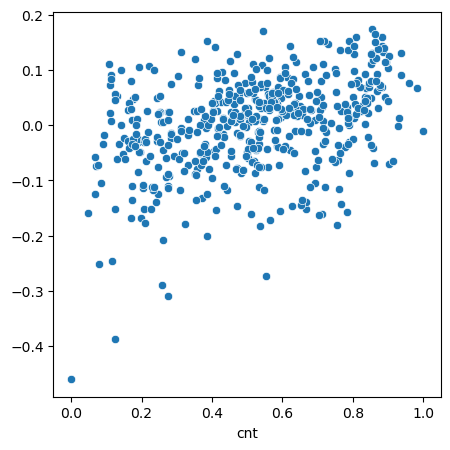

In [65]:
X_train_sm = sm.add_constant(df_train[['yr','casual','atemp','holiday','clear','spring','mon','sun','tue','summer']])
y_train_pred = LR_8.predict(X_train_sm)
res1 = y_train - y_train_pred
plt.figure(figsize=(5,5))
sns.scatterplot(x = y_train,y=res1)
plt.show()

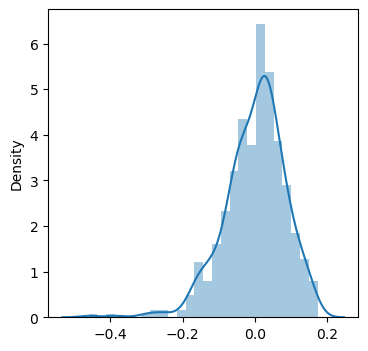

In [66]:
plt.figure(figsize=(4,4))
sns.distplot(res1)
plt.show()

### Residual analysis for model with mixed approach

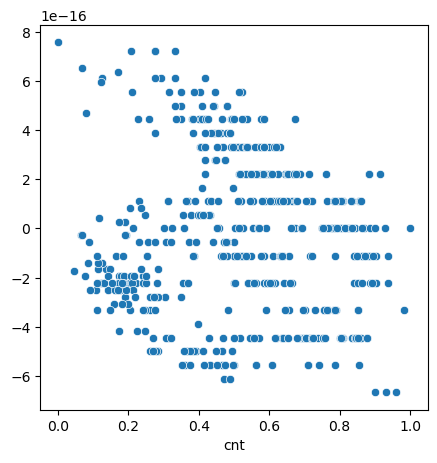

In [67]:
X_train_sm = sm.add_constant(X_train[col])
y_train_pred = rfe_lr_9.predict(X_train_sm)
res2 = y_train - y_train_pred
plt.figure(figsize=(5,5))
sns.scatterplot(x = y_train,y=res2)
plt.show()

In [ ]:
res = res2*10**16
sns.scatterplot(x=y_train,)

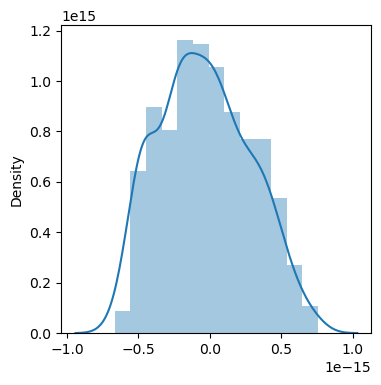

In [68]:
plt.figure(figsize=(4,4))
sns.distplot(res2)
plt.show()

### Predicting dependent variables

In [72]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,oct,sep,clear,mist,mon,sat,sun,thurs,tue,wed
instant,,,,,,,,,,,,,,,,,,,,,
185,0,1,0,29.793347,33.27085,63.7917,5.459106,3065,2978,6043,...,0,0,0,1,0,0,0,0,0,1
536,1,0,1,32.082500,36.04875,59.2083,7.625404,872,5339,6211,...,0,0,1,0,0,0,0,1,0,0
300,0,0,0,19.270000,22.85230,81.2917,13.250121,240,2419,2659,...,1,0,0,1,0,1,0,0,0,0
222,0,0,1,31.433347,34.24915,42.4167,13.417286,884,3896,4780,...,0,0,1,0,0,0,0,0,0,0
153,0,0,0,29.315000,32.19710,30.5000,19.583229,736,4232,4968,...,0,0,1,0,0,1,0,0,0,0


In [73]:
df_test[['temp','atemp','hum','windspeed','casual','registered','cnt']]=scaler.transform(df_test[['temp','atemp','hum','windspeed','casual','registered','cnt']])

In [74]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,oct,sep,clear,mist,mon,sat,sun,thurs,tue,wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.266436,0.529076,0.522154,...,0.086364,0.086364,0.654545,0.318182,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.216751,0.219300,0.219163,...,0.281541,0.281541,0.476601,0.466833,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.102484,0.359190,0.378595,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.225236,0.527577,0.524678,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.361780,0.667088,0.677750,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
y_test_pred1 = LR_8.predict(sm.add_constant(df_test[['yr','casual','atemp','holiday','clear','spring','mon','sun','tue','summer']]))
y_test_pred1.head()

instant
185    0.708826
536    0.758103
300    0.372797
222    0.585834
153    0.518642
dtype: float64

In [79]:
y_test_pred2 = rfe_lr_9.predict(sm.add_constant(df_test[['yr', 'temp', 'casual', 'registered', 'spring', 'summer', 'nov', 'oct']]))
y_test_pred2.head()

instant
185    0.692706
536    0.712034
300    0.303382
222    0.547400
153    0.569029
dtype: float64

### Evaluation of Model 

In [80]:
r_squared = r2_score(df_test.cnt,y_test_pred1)
r_squared

0.8507143559272319

In [81]:
r_squared = r2_score(df_test.cnt,y_test_pred2)
r_squared

1.0

### Note :
        1. From the model we have adjusted r squared value for train set as 0.856 and r squared for test set is 0.85 showing the model is not overfitting. 
        2. There's almost no difference in R squared and adjusted R squared showing no extra features can be added to the    model.
        3. Independence of residual and points around 0 in scatter plot indicates no extra feature can be added all the variance in dependent variable is given by LR_8. 
        

